**IMPORTING LIBRARIES**




In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas_profiling
import scipy.stats as stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import t

from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import cufflinks as cf
cf.go_offline()

**LOADING OUR DATASETS AND PREVIEWING**

In [2]:
#Loading the dataset
url = '/content/Us_shootings.csv'
df = pd.read_csv(url)


In [3]:
#Checking the head
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
#Checking the tail
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,6/15/2020,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


**Previewing the data**. 

In [5]:
#Getting the general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [6]:
#Checking the shape
df.shape

(4895, 15)

**Data Exploration**

In [7]:
#Checking the statistical summaries of the data
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [8]:
# Check for unique values in each column
cat_cols = df.select_dtypes(include ='object').columns.to_list()
cat_cols
for col in cat_cols:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('...........')

name column unique values: 

['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Hannah Fizer'
 'William Slyter' 'Nicholas Hirsh']
...........
date column unique values: 

['1/2/2015' '1/3/2015' '1/4/2015' ... '6/12/2020' '6/13/2020' '6/15/2020']
...........
manner_of_death column unique values: 

['shot' 'shot and Tasered']
...........
armed column unique values: 

['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'unknown' 'shovel'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'metal object'
 'screwdriver' 'lawn mower blade' 'flagpole' 'guns and explosives'
 'cordless drill' 'metal pole' 'Taser' 'metal pipe' 'metal hand tool'
 'blunt object' 'metal stick' 'sharp object' 'meat cleaver' 'carjack'
 'chain' "contractor's level" 'stapler' 'crossbow' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe' 'flashlight' 'vehicle' 'spear' 'chair'
 'pitc

# **5. CLEANING THE DATA**

In [9]:
#Removing naming sytax errors in cols names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [10]:
#Dropping unnecesary columns
df.drop(['id','name'],axis=1,inplace=True)
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [11]:
#Checking the null values
df.isnull().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'A boxplot for Age')

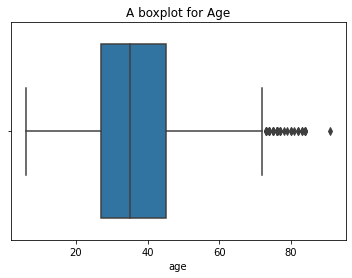

In [13]:
#Checking for outliers 
sns.boxplot(df['age'])
plt.title('A boxplot for Age')

**Date**

In [14]:
#convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

# **Univarient**

**Victim Features**

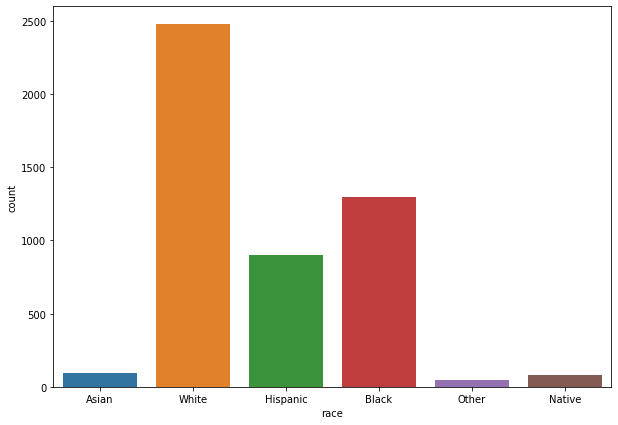

In [15]:
#Most affected race
plt.figure(figsize=(10,7))
sns.countplot(x="race", data=df)
plt.show()

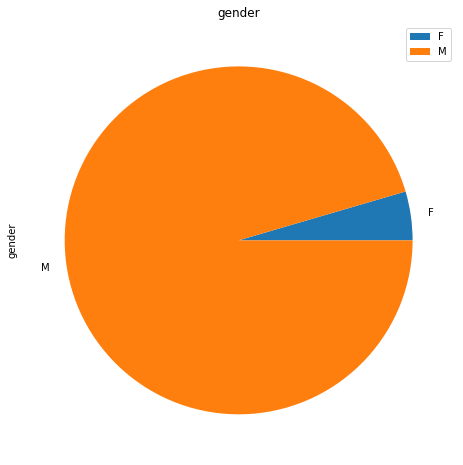

In [16]:
#Gender
counts = df['gender'].value_counts().sort_index()
# Plot a pie chart
counts.plot(kind='pie', title='gender',figsize=(10,8))
plt.legend()
plt.show()

**Behaviour of Suspect**

In [17]:
#Mental Illness
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(
                labels = df.signs_of_mental_illness.value_counts().index,
                values = df.signs_of_mental_illness.value_counts(),
                hole = 0.3,
                textinfo = 'label + percent')])

fig.update_layout(
    title_text = 'Victim Mentally ill?',
    title_x = 0.3)

fig.show()

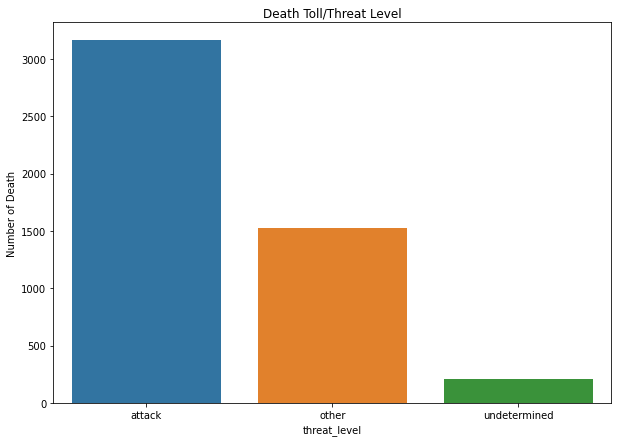

In [18]:
#Threat Level
plt.figure(figsize=(10,7))
sns.countplot(x="threat_level", data=df)
plt.title('Death Toll/Threat Level')
plt.ylabel('Number of Death')
plt.show()

In [19]:
#Flee
fig = go.Figure(data=[go.Pie(
                labels = df.flee.value_counts().index,
                values = df.flee.value_counts(),
                hole = 0.3,
                textinfo = 'label + percent')])

fig.update_layout(
    title_text = 'Did The victim flee?',
    title_x = 0.3)

fig.show()

In [20]:
#Geographic visulization 
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=df['state'],
    z = df['age'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Shootings",
))

fig.update_layout(
    title_text = 'Shootings per State',
    geo_scope='usa',
)

fig.show()

**Bivarient**

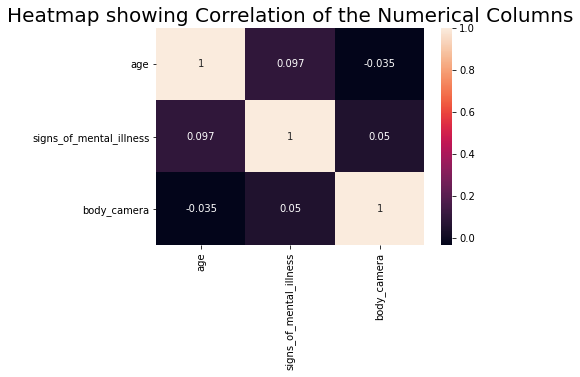

In [21]:
#Calculating the correction
corr = df.corr()
plt.figure()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Heatmap showing Correlation of the Numerical Columns', fontsize = 20)
plt.show()

**Race**

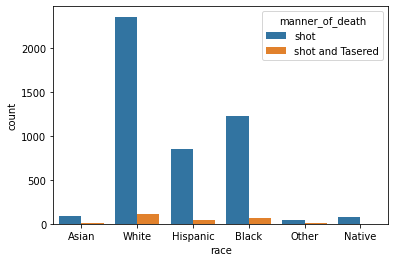

In [22]:
#Race aganist manner of death
sns.countplot(x=df['race'],data=df,hue='manner_of_death')

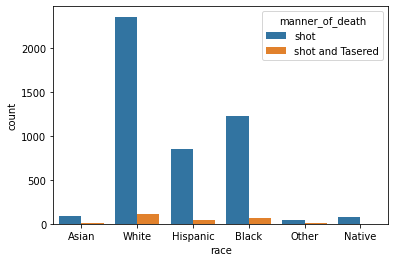

In [23]:
#Vs manner of death
sns.countplot(x=df['race'],data=df,hue='manner_of_death')

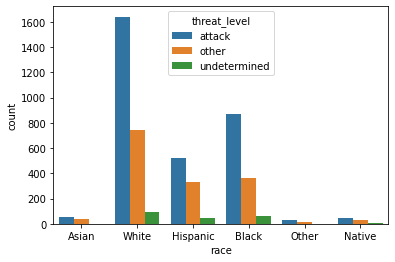

In [24]:
#Vs threat level
sns.countplot(x=df['race'],data=df,hue='threat_level')

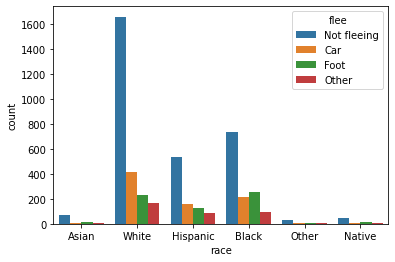

In [25]:
#Vs flee
sns.countplot(x=df['race'],data=df,hue='flee')

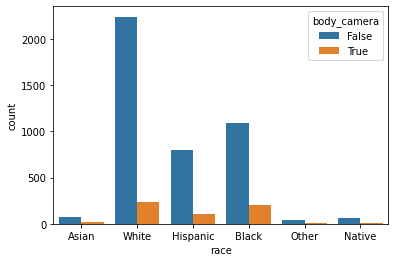

In [26]:
#Vs body cam
sns.countplot(x=df['race'],data=df,hue='body_camera')

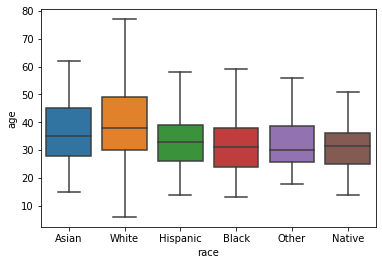

In [27]:
#Vs age
sns.boxplot(x='race',y='age',data=df,showfliers=False)

**Age Aganist Location**

Text(0.5, 0, 'Count')

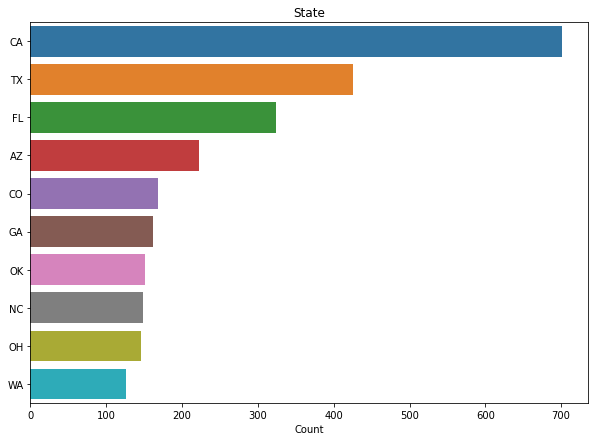

In [28]:
#Top 10 states based on value_counts

plt.figure(figsize = (10,7))
chains = df['state'].value_counts()[:10] 
sns.barplot(x = chains, y = chains.index)
plt.title("State")
plt.xlabel("Count")

Text(0.5, 0, 'Count')

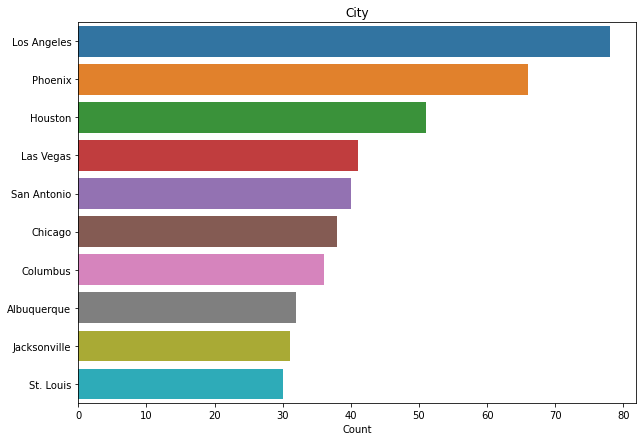

In [29]:
#Top 10 cities based on value_counts

plt.figure(figsize = (10,7))
chains = df['city'].value_counts()[:10] 
sns.barplot(x = chains, y = chains.index)
plt.title("City")
plt.xlabel("Count")

**Which state and city most black were killed?**

In [30]:
#City with most black people
df[(df['race']=='Black')]['state'].value_counts().head(5)
#State of Califonia had the most incidents 

CA    122
FL    111
TX     99
GA     71
LA     60
Name: state, dtype: int64

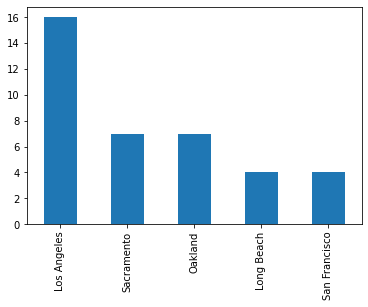

In [31]:
df[(df['race']=='Black')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Which city and State were most white killed?**

In [32]:
#City with most black people
df[(df['race']=='White')]['state'].value_counts().head(5)
#State of Califonia had the most incidents 

CA    221
TX    175
FL    156
AZ    109
OK    100
Name: state, dtype: int64

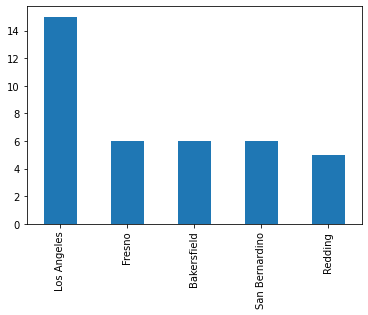

In [33]:
df[(df['race']=='White')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Which city and State were most hispanic group killed?**

In [34]:
df[(df['race']=='Hispanic')]['state'].value_counts().head(5)

CA    316
TX    142
AZ     83
NM     64
FL     51
Name: state, dtype: int64

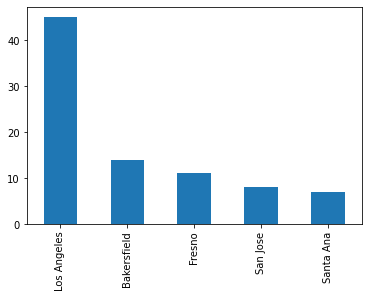

In [35]:
df[(df['race']=='Hispanic')&(df['state']=='CA')]['city'].value_counts().head(5).plot(kind='bar')

**Which city and State were most Native killed?**

In [36]:
df[(df['race']=='Native')]['state'].value_counts().head(5)

AZ    13
AK     9
OK     7
WA     7
ND     5
Name: state, dtype: int64

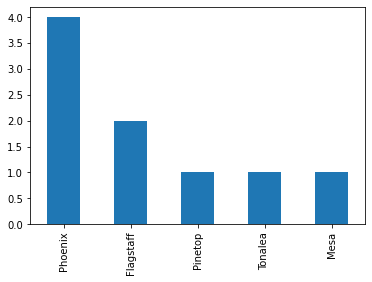

In [37]:
df[(df['race']=='Native')&(df['state']=='AZ')]['city'].value_counts().head(5).plot(kind='bar')

# **Trends**

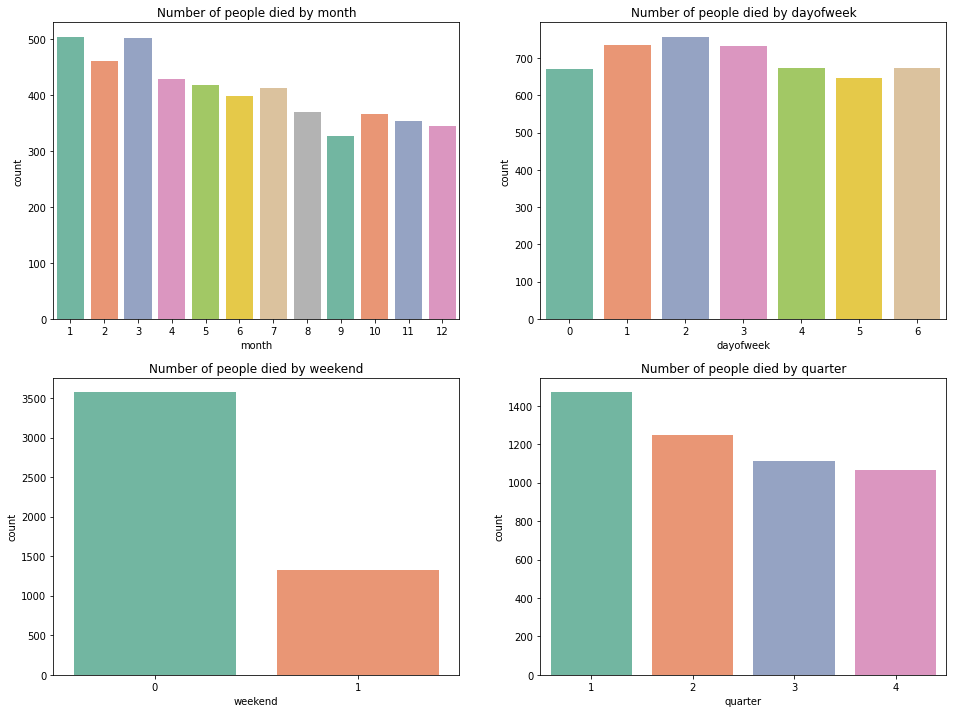

In [38]:
#Visulazation of Number of shootings in day, week, month, quater, year
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.loc[:,'year'] = df['date'].dt.year
df.loc[:,'weekofyear'] = df['date'].dt.isocalendar().week
df.loc[:, 'month'] = df['date'].dt.month
df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int)
df.loc[:, 'quarter'] = df['date'].dt.quarter

fig, axes = plt.subplots(2,2, figsize=(16,12))

def plot_count(x, ax, data=df):
    s = sns.countplot(x=x, data=data, palette='Set2', ax=ax);
    s.set_title(f'Number of people died by {x}')
    
plot_count(x='month', ax=axes[0,0])
plot_count(x='dayofweek', ax=axes[0,1])
plot_count(x='weekend', ax=axes[1,0])
plot_count(x='quarter', ax=axes[1,1])

**Monthly Report**

In [39]:
monthly_df = df['date'].groupby(df.date.dt.to_period('M')).agg('count').to_frame(name="Count")
monthly_df.index = monthly_df.index.to_timestamp()

trace = go.Scatter(
        x = monthly_df.index,
        y = monthly_df.Count,
        name = "Victim count",
        line = dict(color = "#7F7F7F"))

layout = go.Layout(
            title = "Monthly Death Count : Jan, 2015 - June, 2020",
            title_font_size = 20,
            xaxis = dict(title = "Year",title_font_size = 20),
            yaxis = dict(title = "Number of Victim",title_font_size = 20))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

**Yearly Report**

In [40]:
fig = go.Figure(data=[go.Scatter(
    x=df['date'].unique(), y=df['date'].value_counts(),
    mode='markers',
    marker=dict(
        color=px.colors.sequential.Blackbody_r,
        opacity=[1, 0.8, 0.6, 0.4,0.6,0.8],
        size=[140, 120, 100, 80, 60, 40]
    )
)])

fig.update_layout(title='Shootings in Years', yaxis=dict(title='No. of Shootings'))

fig.show()

In [41]:
year_df = df['date'].groupby([df.date.dt.strftime('%Y')]).agg('count').to_frame(name="Count")
year_df.iplot(xTitle = 'Year', yTitle='Number of Victims', title='Victims/Year from 2015 to 2020')

**Day Report**

In [42]:
day_df = df['date'].groupby([df.date.dt.strftime('%A')]).agg('count').to_frame(name="Count")
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df.loc[order].iplot(xTitle = 'Day of Week', yTitle='Number of Victims', title='Victims/Day from 2015 to 2020')

**Day Report**

In [43]:
trace = go.Scatter(
        x = year_df.index,
        y = year_df.Count,
        name = "Victim count",
        line = dict(color = "#7F7F7F"))

layout = go.Layout(
            title = "Monthly Death Count : Jan, 2015 - June, 2020",
            title_font_size = 20,
            xaxis = dict(
                title = "Year",
                title_font_size = 20),
            yaxis = dict(
                title = "Number of Victim",
                title_font_size = 20))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

# **Location Hypothesis**

In [47]:
df.groupby('state')('state').value_counts()

TypeError: ignored